# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks. 

9. You may discuss broad ideas with friends, but all code must be written by yourself.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Plotting the data and prediction is highly encouraged for debugging. But remove debugging/understanding code before submitting.

12. Before subbmission ensure that you submit with the outputs (do not clear the outputs), so that when evaluating we can run selectively.

13. Before submission ensure that the path for the folder containing the data is "../../Data/" 


In [1]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt


**Cell type : TextRead**

# Problem 1: Learning Binary Bayes Classifiers from data with Max. Likelihood 

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. 

1a) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

1b) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

1c) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*




In [2]:
# Cell type : CodeWrite

def Bayes1a(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    # Calculating the mean
    mu_pos = np.mean(X_train[Y_train==1], axis=0)
    mu_neg = np.mean(X_train[Y_train==-1], axis=0)
    
    # Calculating the prior probability
    PY_pos = Y_train[Y_train==1].shape[0]/Y_train.shape[0]
    PY_neg = 1 - PY_pos
    
    # Making predictions
    Y_test_pred = np.zeros(X_test.shape[0])
    for i in range(X_test.shape[0]):
        numerator = PY_pos * np.exp((-1/2) * np.linalg.norm(X_test[i,:] - mu_pos)**2)
        denominator = numerator + (PY_neg * np.exp((-1/2) * np.linalg.norm(X_test[i,:] - mu_neg)**2))
        eta = numerator / denominator        
        Y_test_pred[i] = 1 if eta >= 0.5 else -1    
    return Y_test_pred
    
def Bayes1b(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    # Calculating the covariance matrix
    cov = np.cov(X_train, rowvar=False)
    
    # Calculating the mean
    mu_pos = np.mean(X_train[Y_train==1], axis=0)
    mu_neg = np.mean(X_train[Y_train==-1], axis=0)
    
    # Calculating the prior probability
    PY_pos = Y_train[Y_train==1].shape[0]/Y_train.shape[0]
    PY_neg = 1 - PY_pos
    
    # Making predictions
    Y_test_pred = np.zeros(X_test.shape[0])
    for i in range(X_test.shape[0]):
        pos_exp = (-1/2) * np.dot(np.matmul((X_test[i,:] - mu_pos), np.linalg.inv(cov)), (X_test[i,:] - mu_pos))
        neg_exp = (-1/2) * np.dot(np.matmul((X_test[i,:] - mu_neg), np.linalg.inv(cov)), (X_test[i,:] - mu_neg))
        
        numerator = PY_pos * np.exp(pos_exp)
        denominator = numerator + (PY_neg * np.exp(neg_exp))
        eta = numerator / denominator        
        Y_test_pred[i] = 1 if eta >= 0.5 else -1
    
    return Y_test_pred

def Bayes1c(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    # Calculating the covariance
    cov_pos = np.cov(X_train[Y_train==1],rowvar=False)
    cov_neg = np.cov(X_train[Y_train==-1],rowvar=False)

    # Calculating the mean
    mu_pos = np.mean(X_train[Y_train==1],axis=0)
    mu_neg = np.mean(X_train[Y_train==-1],axis=0)

    # Calculating the prior probability
    PY_pos = Y_train[Y_train==1].shape[0]/Y_train.shape[0]
    PY_neg = 1-PY_pos

    # Making Predictions
    Y_test_pred = np.zeros(X_test.shape[0])
    for i in range(X_test.shape[0]):
        pos_exp = (-1/2) * np.dot(np.matmul((X_test[i,:] - mu_pos), np.linalg.inv(cov_pos)), (X_test[i,:] - mu_pos))
        neg_exp = (-1/2) * np.dot(np.matmul((X_test[i,:] - mu_neg), np.linalg.inv(cov_neg)), (X_test[i,:] - mu_neg))
        eta = (PY_pos * np.exp(pos_exp)) / (PY_pos * np.exp(pos_exp) + PY_neg * np.exp(neg_exp))       
        Y_test_pred[i] = 1 if eta >= 0.5 else -1   

    return Y_test_pred

def printPrediction(X_train, Y_train, X_test):
    """
    Given training data (X_train, Y_train) and test data X_test, applies three different Bayesian classifiers to the
    data and returns their predictions.

    Parameters:
    -----------
    X_train: array-like, shape (n_samples, n_features)
        The training input samples.
    Y_train: array-like, shape (n_samples,)
        The target values (class labels) for the training input samples.
    X_test: array-like, shape (n_samples, n_features)
        The test input samples.

    Returns:
    --------
    A tuple of three arrays, each of shape (n_samples,), containing the predicted class labels for the test input samples
    obtained using three different Bayesian classifiers (Bayes1a, Bayes1b, and Bayes1c), respectively.
    """
    Y_pred_1 = Bayes1a(X_train, Y_train, X_test)
    Y_pred_2 = Bayes1b(X_train, Y_train, X_test)
    Y_pred_3 = Bayes1c(X_train, Y_train, X_test)
    return Y_pred_1,Y_pred_2,Y_pred_3
def printErrorRate(Y_pred_1,Y_pred_2,Y_pred_3):
    """
    Given three arrays of predicted class labels (Y_pred_1, Y_pred_2, Y_pred_3), compares each of them with their
    corresponding test target values (Y_test1, Y_test2, Y_test3) and prints the classification error rate for each
    classifier.

    Parameters:
    -----------
    Y_pred_1: array-like, shape (n_samples,)
        The predicted class labels for the test data obtained using the first Bayesian classifier.
    Y_pred_2: array-like, shape (n_samples,)
        The predicted class labels for the test data obtained using the second Bayesian classifier.
    Y_pred_3: array-like, shape (n_samples,)
        The predicted class labels for the test data obtained using the third Bayesian classifier.

    Returns:
    --------
    None. The function prints the classification error rate for each classifier to the output console.
    """
    print(1-(Y_pred_1 == Y_test1).sum() / len(Y_test1))
    print(1-(Y_pred_2 == Y_test2).sum() / len(Y_test2))
    print(1-(Y_pred_3 == Y_test3).sum() / len(Y_test3))
def plot_classifier(ax, title, X, Y, Bayes, pos_X, neg_X):
    """
    Given an axis object, a title, the meshgrid coordinates (X, Y), the Bayesian decision function (Bayes), and two
    sets of training data points (pos_X and neg_X), plots the decision boundary and the training data points on the axis.

    Parameters:
    -----------
    ax: matplotlib.axes.Axes object
        The axis object on which to plot the decision boundary and the training data points.
    title: str
        The title of the plot.
    X: array-like, shape (n_samples, n_features)
        The X-coordinates of the meshgrid.
    Y: array-like, shape (n_samples, n_features)
        The Y-coordinates of the meshgrid.
    Bayes: array-like, shape (n_samples, n_features)
        The Bayesian decision function evaluated on the meshgrid coordinates.
    pos_X: array-like, shape (n_pos_samples, n_features)
        The positive class training data points.
    neg_X: array-like, shape (n_neg_samples, n_features)
        The negative class training data points.

    Returns:
    --------
    None. The function plots the decision boundary and the training data points on the axis object.
    """
    # Plot the decision boundary
    ax.contourf(X, Y, Bayes.reshape(X.shape), alpha=0.5, colors=['lightcoral', 'palegreen'])
    # Plot the training data points
    ax.scatter(pos_X[:, 0], pos_X[:, 1], c='green', label='Positive', alpha=0.25, marker = '+', s = 115)
    ax.scatter(neg_X[:, 0], neg_X[:, 1], c='red', label='Negative', alpha=0.25, marker = 'o')
    # Set the x and y labels and the title
    ax.set_xlabel('X1', fontsize=14)
    ax.set_ylabel('X2', fontsize=14)
    ax.title.set_text(title)
    # Add the legend
    ax.legend()
def printPlot(X_train,Y_train,pos_X_train,neg_X_train,datasetName):
    """
    Plots the Bayes classifier with assumptions 1a, 1b, and 1c on a dataset.

    Parameters:
    X_train (numpy.ndarray): The training data features.
    Y_train (numpy.ndarray): The training data labels.
    pos_X_train (numpy.ndarray): The positive class training data features.
    neg_X_train (numpy.ndarray): The negative class training data features.
    datasetName (str): The name of the dataset being plotted.

    Returns:
    None.

    """
    X_axis, Y_axis = np.meshgrid(np.arange(start = X_train[:, 0].min() - 0.5, stop = X_train[:, 0].max() + 0.5, step = 0.1),np.arange(start = X_train[:, 1].min() - 0.5, stop = X_train[:, 1].max() + 0.5, step = 0.1))
    fig, ax = plt.subplots(nrows = 1, ncols = 3)
    fig.suptitle(f'Bayes Classifier for {datasetName} with assumptions 1a, 1b, and 1c respectively') 
    plot_classifier(ax[0], 'Classifier with assumption 1a', X_axis, Y_axis, Bayes1a(X_train, Y_train, np.array([X_axis.ravel(), Y_axis.ravel()]).T), pos_X_train, neg_X_train)
    plot_classifier(ax[1], 'Classifier with assumption 1b', X_axis, Y_axis, Bayes1b(X_train, Y_train1, np.array([X_axis.ravel(), Y_axis.ravel()]).T), pos_X_train, neg_X_train)
    plot_classifier(ax[2], 'Classifier with assumption 1c', X_axis, Y_axis, Bayes1c(X_train, Y_train1, np.array([X_axis.ravel(), Y_axis.ravel()]).T), pos_X_train, neg_X_train)
    plt.show()
def sepClass(X,Y):
    """
    Returns two subsets of feature matrix X, containing instances where Y is equal to 1 and -1 respectively.

    Parameters:
    X (numpy array): Feature matrix of shape (m, n)
    Y (numpy array): Target vector of shape (m, )

    Returns:
    pos_X (numpy array): Subset of X containing instances where Y is equal to 1, of shape (pos_m, n)
    neg_X (numpy array): Subset of X containing instances where Y is equal to -1, of shape (neg_m, n)
    """
    return X[Y[:,] == 1],X[Y[:,] == -1]
def verifyingResult(Y_pred_1_1,Y_pred_1_2,Y_pred_1_3,Y_pred_2_1,Y_pred_2_2,Y_pred_2_3,Y_pred_3_1,Y_pred_3_2,Y_pred_3_3):
    """
    Prints the error rate for each of the nine combinations of predicted values and true values.

    Parameters:
    Y_pred_1_1 (numpy array): Predicted target variable for dataset 1 using assumption 1a, of shape (m1, )
    Y_pred_1_2 (numpy array): Predicted target variable for dataset 1 using assumption 1b, of shape (m1, )
    Y_pred_1_3 (numpy array): Predicted target variable for dataset 1 using assumption 1c, of shape (m1, )
    Y_pred_2_1 (numpy array): Predicted target variable for dataset 2 using assumption 1a, of shape (m2, )
    Y_pred_2_2 (numpy array): Predicted target variable for dataset 2 using assumption 1b, of shape (m2, )
    Y_pred_2_3 (numpy array): Predicted target variable for dataset 2 using assumption 1c, of shape (m2, )
    Y_pred_3_1 (numpy array): Predicted target variable for dataset 3 using assumption 1a, of shape (m3, )
    Y_pred_3_2 (numpy array): Predicted target variable for dataset 3 using assumption 1b, of shape (m3, )
    Y_pred_3_3 (numpy array): Predicted target variable for dataset 3 using assumption 1c, of shape (m3, )

    Returns:
    None
    """
    print('#Error Rate validation')
    printErrorRate(Y_pred_1_1,Y_pred_1_2,Y_pred_1_3)
    printErrorRate(Y_pred_2_1,Y_pred_2_2,Y_pred_2_3)
    printErrorRate(Y_pred_3_1,Y_pred_3_2,Y_pred_3_3)

In [3]:
# Cell type : Convenience

# Testing the functions above

# To TAs: Replace this cell with the testing cell developed.

# To students: You may use the example here for testing syntax issues 
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just 
# solve the problem for this one example given below.) 


X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))

Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)




**Cell type : TextRead**

# Problem 1

1d) Run the above three algorithms (Bayes1a,1b and 1c), for the three datasets given (dataset1_1.npz, dataset1_2.npz, dataset1_3.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 3 datasets = 9 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red, for reference see Bishop Fig 4.5). Add the training data points also on the plot. Plots to be organised into 3 plots follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 9 plots appropriately. 

In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem to explain) your observations regarding the six learnt classifiers, and also give the error rate of the three classifiers on the three datasets (use X_test and Y_test) as 3x3 table, with appropriately named rows and columns.


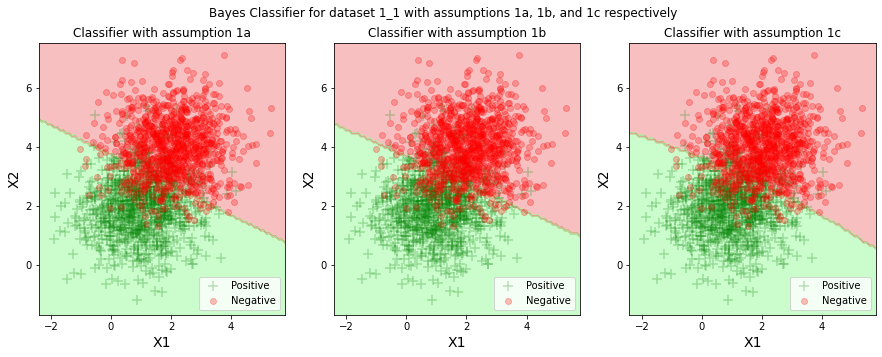

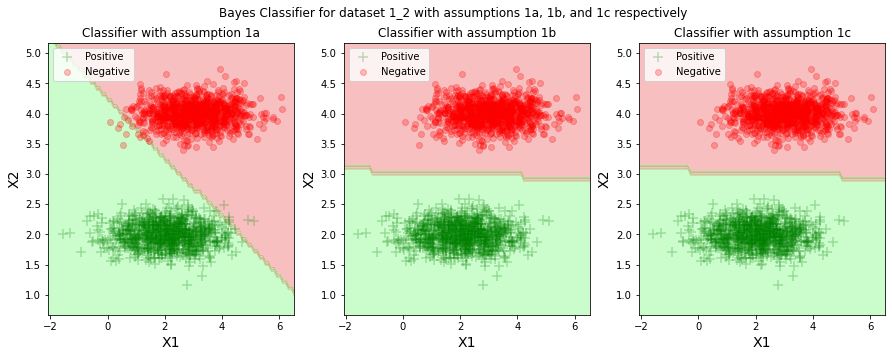

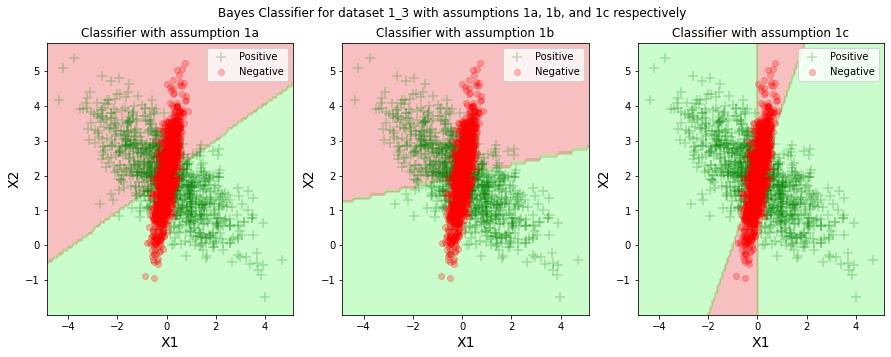

In [4]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)
# Loading the dataset
files = ['../../Data/dataset1_1.npz', '../../Data/dataset1_2.npz', '../../Data/dataset1_3.npz']
train_features = []
train_labels = []
test_features = []
test_labels = []
for file in files:
    data = np.load(file)
    train_features.append(data['arr_0'])
    train_labels.append(data['arr_1'])
    test_features.append(data['arr_2'])
    test_labels.append(data['arr_3'])    
X_train1,X_train2,X_train3,Y_train1,Y_train2,Y_train3,X_test1,X_test2,X_test3,Y_test1,Y_test2,Y_test3 = train_features[0],train_features[1],train_features[2],train_labels[0],train_labels[1],train_labels[2],test_features[0],test_features[1],test_features[2],test_labels[0],test_labels[1],test_labels[2]

#Calculate Prediction
Y_pred_1_1,Y_pred_1_2,Y_pred_1_3 = printPrediction(X_train1, Y_train1, X_test1)
Y_pred_2_1,Y_pred_2_2,Y_pred_2_3 = printPrediction(X_train2, Y_train2, X_test2)
Y_pred_3_1,Y_pred_3_2,Y_pred_3_3 = printPrediction(X_train3, Y_train3, X_test3)

#Separating the positive and the negative class
pos_X_train1,neg_X_train1 = sepClass(X_train1,Y_train1)
pos_X_train2,neg_X_train2 = sepClass(X_train2,Y_train2)
pos_X_train3,neg_X_train3 = sepClass(X_train3,Y_train3)

#Plotting to view the result
plt.rcParams['figure.figsize'] = [15,5]
printPlot(X_train1,Y_train1,pos_X_train1,neg_X_train1,'dataset 1_1')
printPlot(X_train2,Y_train2,pos_X_train2,neg_X_train2,'dataset 1_2')
printPlot(X_train3,Y_train3,pos_X_train3,neg_X_train3,'dataset 1_3')

#Verification of result - Uncomment if need to review the result
#verifyingResult(Y_pred_1_1,Y_pred_1_2,Y_pred_1_3,Y_pred_2_1,Y_pred_2_2,Y_pred_2_3,Y_pred_3_1,Y_pred_3_2,Y_pred_3_3)

** Cell type : TextWrite ** 
(Write your observations and table of errors here)
### Error Rate:
| Dataset\Assumption | Classifier 1a  | Classifier 1b | Classifier 1c |
| :---:              | :-------------:|:-----------:  |      :------: |
| Dataset 1          | 0.126          | 0.12450000000000006        | 0.12450000000000006       |
| Dataset 2          | 0.008499999999999952         | 0             |             0 |
| Dataset 3          | 0.497          | 0.495         |         0.264 |

### Observations:
1.It can be observed that the accuracy increases when we move from classification 1a to classification 1c. This is because in case 1a we have assumed that the data for both the classes (+1,-1) have equal variances, which is equivalent to ignoring the variance observed in the data. <br>
2. When we move to class 1b, we use this observation to compute common variance which reduce the performance when both classes vary in different directions (as given in dataset 3)<br>
3. In the final case 1c, we compute different covariance matrices for each class and handle this issue by using Naive Bayes Classification.



** Cell type : TextRead ** 


# Problem 2 : Learning Multiclass Bayes Classifiers from data with Max. Likeli.

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. The $4\times 4$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below.

$L=\begin{bmatrix} 0 &1 & 2& 3\\ 1 &0 & 1& 2\\ 2 &1 & 0& 1\\ 3 &2 & 1& 0 \end{bmatrix}$ 

2a) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $I$.

2b) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma$.

2c) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma_a$.



In [5]:
# Cell type : CodeWrite
# Fill in functions in this cell

#Initialize the loss matrix
L = np.array([[0,1,2,3],[1,0,1,2],[2,1,0,1],[3,2,1,0]])

def Bayes2a(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    # Calculating the mean of each class
    mu = {}
    Py = {}
    classes = np.unique(Y_train)
    for c in classes:
        mu[c] = np.mean(X_train[Y_train == c], axis=0)
        Py[c] = Y_train[Y_train == c].shape[0] / Y_train.shape[0]
        
    # Calculating the outcome
    I = np.identity(X_train.shape[1])
    Y_pred = np.zeros(X_test.shape[0])    
    for i in range(len(X_test)):
        exp = {}
        eta = {}
        for c in classes:
            exp[c] = Py[c] * np.exp((-0.5) * np.matmul(np.matmul((X_test[i, :] - mu[c]), I), (X_test[i, :] - mu[c])))
        for c in classes:
            eta[c] = exp[c] / sum(exp.values())
        loss = np.dot(list(eta.values()), L)
        Y_pred[i] = np.argmin(loss) + 1
        
    return Y_pred    
    
def Bayes2b(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    # Calculating the mean of each class
    mu = {}
    Py = {}
    classes = np.unique(Y_train)
    for c in classes:
        mu[c] = np.mean(X_train[Y_train == c], axis=0)
        Py[c] = Y_train[Y_train == c].shape[0] / Y_train.shape[0]
    
    # Calculating the outcome
    cov = np.cov(X_train,rowvar=False) 
    Y_pred = np.zeros(X_test.shape[0])   
    
    for i in range(len(X_test)):
        exp = {}
        eta = {}
        for c in classes:
            exp[c] = Py[c] * np.exp((-0.5) * np.dot(np.dot((X_test[i, :] - mu[c]), np.linalg.inv(cov)), (X_test[i, :] - mu[c])))
        for c in classes:
            eta[c] = exp[c] / sum(exp.values())        
        loss = np.dot(list(eta.values()), L)
        Y_pred[i] = np.argmin(loss) + 1
        
    return Y_pred

def Bayes2c(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    classes = np.unique(Y_train)
    mus, Py, covs = [], [], []

    for label in classes:
        X_label = X_train[Y_train == label]
        mu = np.mean(X_label, axis=0)
        mus.append(mu)

        n_samples = X_label.shape[0]
        Py_label = n_samples / Y_train.shape[0]
        Py.append(Py_label)

        cov = np.cov(X_label, rowvar=False)
        covs.append(cov)

    # Calculating the outcome
    Y_pred = np.zeros(X_test.shape[0])
    for i, x_test in enumerate(X_test):
        eta = []
        for j, label in enumerate(classes):
            mu, Py_label, cov = mus[j], Py[j], covs[j]
            int_val = ((x_test - mu) @ np.linalg.inv(cov)) @ (x_test - mu)
            exp = Py_label * np.exp(-0.5 * int_val) / np.sqrt(np.linalg.det(cov))
            eta.append(exp)

        eta /= np.sum(eta)
        Y_pred[i] = np.argmin(np.dot(eta, L)) + 1

    return Y_pred

def printPrediction(X_train, Y_train, X_test):
    """
    Given training data (X_train, Y_train) and test data X_test, applies three different Bayesian classifiers to the
    data and returns their predictions.

    Parameters:
    -----------
    X_train: array-like, shape (n_samples, n_features)
        The training input samples.
    Y_train: array-like, shape (n_samples,)
        The target values (class labels) for the training input samples.
    X_test: array-like, shape (n_samples, n_features)
        The test input samples.

    Returns:
    --------
    A tuple of three arrays, each of shape (n_samples,), containing the predicted class labels for the test input samples
    obtained using three different Bayesian classifiers (Bayes1a, Bayes1b, and Bayes1c), respectively.
    """
    Y_pred_1 = Bayes2a(X_train, Y_train, X_test)
    Y_pred_2 = Bayes2b(X_train, Y_train, X_test)
    Y_pred_3 = Bayes2c(X_train, Y_train, X_test)
    return Y_pred_1,Y_pred_2,Y_pred_3
def printErrorRate(Y_pred_1,Y_pred_2,Y_pred_3,Y_test1):
    """
    Given three arrays of predicted class labels (Y_pred_1, Y_pred_2, Y_pred_3), compares each of them with their
    corresponding test target values (Y_test1, Y_test2, Y_test3) and prints the classification error rate for each
    classifier.

    Parameters:
    -----------
    Y_pred_1: array-like, shape (n_samples,)
        The predicted class labels for the test data obtained using the first Bayesian classifier.
    Y_pred_2: array-like, shape (n_samples,)
        The predicted class labels for the test data obtained using the second Bayesian classifier.
    Y_pred_3: array-like, shape (n_samples,)
        The predicted class labels for the test data obtained using the third Bayesian classifier.

    Returns:
    --------
    None. The function prints the classification error rate for each classifier to the output console.
    """
    print(1-(Y_pred_1 == Y_test1).sum() / len(Y_test1))
    print(1-(Y_pred_2 == Y_test1).sum() / len(Y_test1))
    print(1-(Y_pred_3 == Y_test1).sum() / len(Y_test1))    
def printPlot(X_train,Y_train,one_X_train,two_X_train,three_X_train,four_X_train,datasetName):
    """
    This function printPlot generates a 3-panel plot with the results of the Bayesian classifier applied to a given dataset. The function takes in the following parameters:

    Parameters:
    -----------
    X_train: a numpy array with shape (n_samples, n_features) representing the training data.
    Y_train: a numpy array with shape (n_samples, ) representing the labels of the training data.
    one_X_train, two_X_train, three_X_train, four_X_train: numpy arrays representing subsets of the training data, each corresponding to a different class label.
    datasetName: a string representing the name of the dataset.
    
    Returns:
    --------
    None.It just displays the plot.
    """
    X_axis, Y_axis = np.meshgrid(np.arange(start = X_train[:, 0].min() - 0.5, stop = X_train[:, 0].max() + 0.5, step = 0.1),np.arange(start = X_train[:, 1].min() - 0.5, stop = X_train[:, 1].max() + 0.5, step = 0.1))
    fig, ax = plt.subplots(nrows = 1, ncols = 3)
    fig.suptitle(f'Bayes Classifier for {datasetName} with assumptions 2a, 2b, and 2c respectively')
    titles = ['Classifier with assumption 2a', 'Classifier with assumption 2b', 'Classifier with assumption 2c']
    for i, bayes_func in enumerate([Bayes2a, Bayes2b, Bayes2c]):
        ax[i].contourf(X_axis, Y_axis, bayes_func(X_train, Y_train, np.array([X_axis.ravel(), Y_axis.ravel()]).T).reshape(X_axis.shape),alpha = 0.5, colors = ['lightblue', 'orange','lightcoral','palegreen'])
        ax[i].scatter(one_X_train[:,0], one_X_train[:,1], c = 'blue', label = 'One', alpha = 0.25,marker = '+', s = 30)
        ax[i].scatter(two_X_train[:,0], two_X_train[:,1], c = 'purple', label = 'Two', alpha = 0.25,marker = 'o', s = 30)
        ax[i].scatter(three_X_train[:,0], three_X_train[:,1], c = 'orange', label = 'Three', alpha = 0.25,marker = 's', s = 30)
        ax[i].scatter(four_X_train[:,0], four_X_train[:,1], c = 'green', label = 'Four', alpha = 0.25,marker = 'x', s = 30)
        ax[i].set_xlabel('X1',fontsize=15)
        ax[i].set_ylabel('X2',fontsize=15)
        ax[i].title.set_text(titles[i])
        ax[i].legend()    
def sepClass(X,Y):
    """
    Returns two subsets of feature matrix X, containing instances where Y is equal to 1 and -1 respectively.

    Parameters:
    X (numpy array): Feature matrix of shape (m, n)
    Y (numpy array): Target vector of shape (m, )

    Returns:
    pos_X (numpy array): Subset of X containing instances where Y is equal to 1, of shape (pos_m, n)
    neg_X (numpy array): Subset of X containing instances where Y is equal to -1, of shape (neg_m, n)
    """
    return X[Y[:,] == 1],X[Y[:,] == 2],X[Y[:,] == 3],X[Y[:,] == 4]        
def verifyingResult(Y_test, Y_pred, message):
    """
    Prints the confusion matrix

    Parameters:
    Y_test (numpy array): Test target variable
    Y_pred (numpy array): Predicted target variable
    message (string): Display the message    

    Returns:
    None, just display the confusion matrix and expected loss
    """
    print(f'#Result verification for {message}')    
    count11=count12=count13=count14=count21=count22=count23=count24=count31=count32=count33=count34=count41=count42=count43=count44 = 0
    count = {}
    for actual, prediction in zip(Y_test, Y_pred):
        count.setdefault(actual, {}).setdefault(prediction, 0)
        count[actual][prediction] += 1
    count_matrix = [[count.get(i, {}).get(j, 0) for j in range(1, 5)] for i in range(1, 5)]
    (count11, count12, count13, count14), (count21, count22, count23, count24), (count31, count32, count33, count34), (count41, count42, count43, count44) = count_matrix
    #Computing the expected loss
    print((L[0,1]*count12+L[0,2]*count13+L[0,3]*count14+L[1,0]*count21+L[1,2]*count23+L[1,3]*count24+L[2,0]*count31+L[2,1]*count32+L[2,3]*count34+L[3,0]*count41+L[3,1]*count42+L[3,2]*count43)/len(Y_test))
    #Confusion Matrix
    conf_matrix_percentage = np.array([[count11,count12,count13,count14],[count21,count22,count23,count24],[count31,count32,count33,count34],[count41,count42,count43,count44]])/len(Y_test)
    #Checking if confusion matrix was computed properly and printing the results
    if conf_matrix_percentage.sum() == 1:
        print(conf_matrix_percentage) 
        conf_matrix_number = np.array([[count11,count12,count13,count14],[count21,count22,count23,count24],[count31,count32,count33,count34],[count41,count42,count43,count44]])
        print(conf_matrix_number)     
        

In [6]:
# Cell type : Convenience

# Testing the functions above

# Data 1

mat1=np.array([[1.,0.],[0.,1.]])
mat2=np.array([[1.,0.],[0.,1.]])
mat3=np.array([[1.,0.],[0.,1.]])
mat4=np.array([[1.,0.],[0.,1.]])

X_train_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_train_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_train_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_train_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_train = np.concatenate((X_train_1, X_train_2, X_train_3, X_train_4), axis=0)
Y_train = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))


X_test_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_test_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_test_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_test_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_test = np.concatenate((X_test_1, X_test_2, X_test_3, X_test_4), axis=0)
Y_test = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))

Y_pred_test_2a = Bayes2a(X_train, Y_train, X_test)
Y_pred_test_2b = Bayes2b(X_train, Y_train, X_test)
Y_pred_test_2c = Bayes2c(X_train, Y_train, X_test)



**Cell type : TextRead**

# Problem 2

2d) Run the above three algorithms (Bayes2a,2b and 2c), for the two datasets given (dataset2_1.npz, dataset2_2.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 2 datasets = 6 plots) on a 2d plot (color the 4 areas classified as 1,2,3 and 4 differently). Add the training data points also on the plot. Plots to be organised as follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 6 plots appropriately. 

In the next Textwrite cell, summarise your observations regarding the six learnt classifiers. Give the *expected loss* (use the Loss matrix given in the problem.) of the three classifiers on the two datasets (use X_test and Y_test) as 2x3 table, with appropriately named rows and columns. Also, give the 4x4 confusion matrix of the final classifier for all three algorithms and both datasets. 


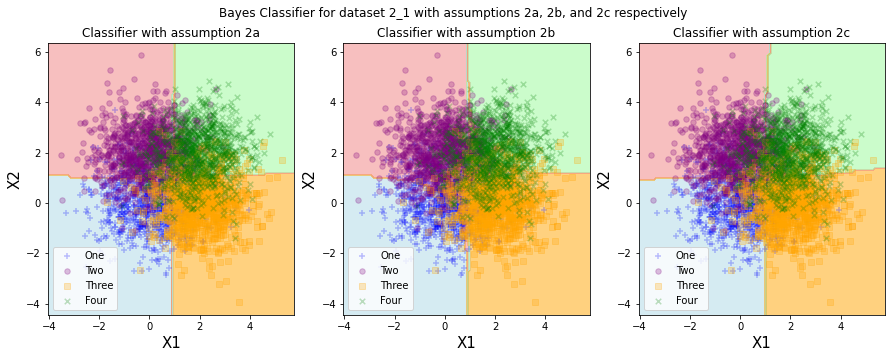

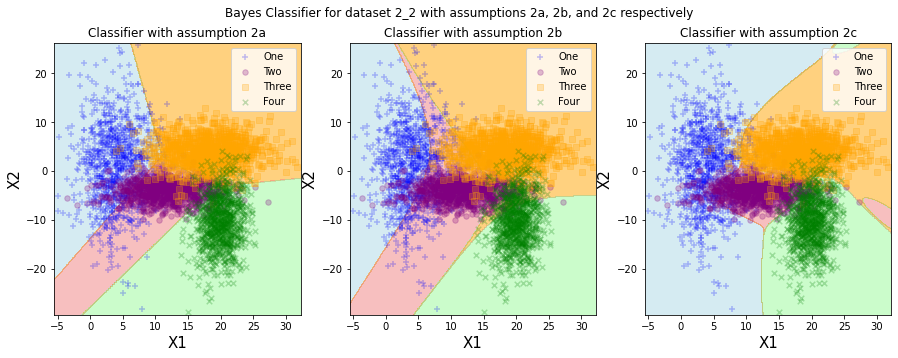

In [7]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)
# Loading the dataset
files = ['../../Data/dataset2_1.npz', '../../Data/dataset2_2.npz']
train_features = []
train_labels = []
test_features = []
test_labels = []
for file in files:
    data = np.load(file)
    train_features.append(data['arr_0'])
    train_labels.append(data['arr_1'])
    test_features.append(data['arr_2'])
    test_labels.append(data['arr_3'])    
    
X_train1,X_train2,Y_train1,Y_train2,X_test1,X_test2,Y_test1,Y_test2 = train_features[0],train_features[1],train_labels[0],train_labels[1],test_features[0],test_features[1],test_labels[0],test_labels[1]

#Calculate Prediction
Y_pred_1_1,Y_pred_1_2,Y_pred_1_3 = printPrediction(X_train1, Y_train1, X_test1)
Y_pred_2_1,Y_pred_2_2,Y_pred_2_3 = printPrediction(X_train2, Y_train2, X_test2)

#Separating each classes'
one_X_train1,two_X_train1,three_X_train1,four_X_train1 = sepClass(X_train1,Y_train1) 
one_X_train2,two_X_train2,three_X_train2,four_X_train2 = sepClass(X_train2,Y_train2) 

#Print the plots
plt.rcParams['figure.figsize'] = [15,5]
printPlot(X_train1,Y_train1,one_X_train1,two_X_train1,three_X_train1,four_X_train1,'dataset 2_1')
printPlot(X_train2,Y_train2,one_X_train2,two_X_train2,three_X_train2,four_X_train2,'dataset 2_2')

#Verification of result - Uncomment if need to review the result 
#verifyingResult(Y_test1, Y_pred_1_1, 'Y_test1 VS Y_pred_1_1')
#verifyingResult(Y_test1, Y_pred_1_2, 'Y_test1 VS Y_pred_1_2')
#verifyingResult(Y_test1, Y_pred_1_3, 'Y_test1 VS Y_pred_1_3')
#verifyingResult(Y_test2, Y_pred_2_1, 'Y_test2 VS Y_pred_2_1')
#verifyingResult(Y_test2, Y_pred_2_2, 'Y_test2 VS Y_pred_2_2')
#verifyingResult(Y_test2, Y_pred_2_3, 'Y_test2 VS Y_pred_2_3')

** Cell type : TextWrite ** 
(Write your observations and table of errors here)
### Observations:
The loss matrix (maximum error) indicates how far away from the correct class the prediction is. We want to minimize this error, so we make the decision boundaries more refined by using the confusion matrix (minimum error). We can see that as we move from assumption 2a to assumption 2c our decision boundaries become more refined; however, for the dataset 2_1 we do not notice any improvement in decision boundary quality. This may be due to the hard nature of distinguishing between these two classes (mixed too much).

### Dataset 2_1

### Confusion Matrix in decimal % obtained by using classifier 2a

| True\Predicted | 1              |  2            |  3            | 4           |
| :---:          | :-------------:|:-----------:  |      :------: |:----:       |
|  1             | 0.15825        | 0.05475       | 0.034         |  0.003      |
|  2             | 0.02425        | 0.1845        | 0.0155        |  0.02575    |
|  3             | 0.0215         | 0.01225       | 0.1925        |  0.02375    |
|  4             | 0.00375        | 0.034         | 0.0485        |  0.16375    |

### Confusion Matrix in number obtained by using classifier 2a

| True\Predicted | 1              |  2            |  3            | 4           |
| :---:          | :-------------:|:-----------:  |      :------: |:----:       |
|  1             | 633| 219 | 136 | 12   |
|  2             | 97 | 738 | 62 | 103    |
|  3             | 86 |  49 |770 | 95    |
|  4             | 15 |136 | 194 | 655   |

### Confusion Matrix in decimal % obtained by using classifier 2b

| True\Predicted | 1              |  2            |  3            | 4           |
| :---:          | :-------------:|:-----------:  |      :------: |:----:       |
|  1             | 0.11575        | 0.097        | 0.03625         |  0.001      |
|  2             | 0.01075        | 0.19775        | 0.02825        |  0.01325    |
|  3             | 0.01         | 0.02375       | 0.2045        |  0.01175    |
|  4             | 0.001        | 0.03725         | 0.0865        |  0.12525    |

### Confusion Matrix in number obtained by using classifier 2b

| True\Predicted | 1              |  2            |  3            | 4           |
| :---:          | :-------------:|:-----------:  |      :------: |:----:       |
|  1             | 463 | 388 | 145 |  4   |
|  2             | 43 | 791 | 113 |  53    |
|  3             | 40 | 95 | 818 | 47   |
|  4             | 4 | 149 | 346 | 501   |



### Confusion Matrix in decimal % obtained by using classifier 2c

| True\Predicted | 1              |  2            |  3            | 4           |
| :---:          | :-------------:|:-----------:  |      :------: |:----:       |
|  1             | 0.15825        | 0.0545       | 0.0345         |  0.00275      |
|  2             | 0.02475        | 0.1855        | 0.01525        |  0.0245     |
|  3             | 0.02175         | 0.01175       | 0.193        |  0.0235     |
|  4             | 0.00375        | 0.0335         | 0.05025        |  0.1625    |

### Confusion Matrix in number obtained by using classifier 2c

| True\Predicted | 1              |  2            |  3            | 4           |
| :---:          | :-------------:|:-----------:  |      :------: |:----:       |
|  1             | 633 | 218 | 138 | 11  |
|  2             | 99 | 742 | 61 | 98    |
|  3             | 87 | 47 | 772 | 94   |
|  4             | 15 | 134 | 201 | 650  |

### Dataset 2_2

### Confusion Matrix in decimal % obtained by using classifier 2a


| True\Predicted | 1              |  2            |  3            | 4           |
| :---:          | :-------------:|:-----------:  |      :------: |:----:       |
|  1             | 0.2075        | 0.0375       | 0.0045         |  0.0005      |
|  2             | 0.02325        | 0.196        | 0.0115        |  0.01925    |
|  3             | 0.0075         | 0.01525       | 0.22625        |  0.001    |
|  4             | 0.        | 0.00575         | 0.0195        |  0.22475    |

### Confusion Matrix in number obtained by using classifier 2a
| True\Predicted | 1              |  2            |  3            | 4           |
| :---:          | :-------------:|:-----------:  |      :------: |:----:       |
|  1             | 830 | 150 | 18 |  2 |
|  2             | 93 | 784 | 46 | 77   |
|  3             | 30 | 61 | 905 |  4  |
|  4             | 0 | 23 | 78 | 899  |

### Confusion Matrix in decimal % obtained by using classifier 2b


| True\Predicted | 1              |  2            |  3            | 4           |
| :---:          | :-------------:|:-----------:  |      :------: |:----:       |
|  1             | 0.16875        | 0.0755        | 0.00575         |  0.      |
|  2             | 0.00975        | 0.18725        | 0.05125        |  0.00175    |
|  3             | 0.00175         | 0.0295       | 0.21875        |  0.    |
|  4             | 0.        | 0.00075         | 0.07425        |  0.175    |

### Confusion Matrix in number obtained by using classifier 2b
| True\Predicted | 1              |  2            |  3            | 4           |
| :---:          | :-------------:|:-----------:  |      :------: |:----:       |
|  1             | 675 | 302 | 23 |  0  |
|  2             | 39 | 749 | 205 |   7    |
|  3             | 7 | 118 | 875  | 0   |
|  4             | 0  | 3 | 297 | 700  |

### Confusion Matrix in decimal % obtained by using classifier 2c

| True\Predicted | 1              |  2            |  3            | 4           |
| :---:          | :-------------:|:-----------:  |      :------: |:----:       |
|  1             | 0.22525        | 0.02       | 0.00475         |  0.      |
|  2             | 0.016        | 0.206        | 0.01175        |  0.01625    |
|  3             | 0.00475         | 0.00775       | 0.234        |  0.0035    |
|  4             | 0.        | 0.009         | 0.012        |  0.229    |

### Confusion Matrix in number obtained by using classifier 2c
| True\Predicted | 1              |  2            |  3            | 4           |
| :---:          | :-------------:|:-----------:  |      :------: |:----:       |
|  1             | 901 | 80 | 19 |  0  |
|  2             | 64 | 824 | 47 | 65    |
|  3             | 19 | 31 | 936 | 14  |
|  4             | 0 | 36  | 48 | 916  |

### Expected Loss
| Dataset\Assumption | Classifier 2a  | Classifier 2b | Classifier 2c |
| :---:              | :-------------:|:-----------:  |      :------: |
| Dataset 1          | 0.42975        | 0.4575        | 0.428         |
| Dataset 2          | 0.1835         | 0.26025       | 0.1405        |


In [8]:
# Cell type: convenience

** Cell type: TextWrite **
Give the biases and variances computed for the various algorithms with various degrees and lambdas and summarise your findings.



** Cell type : TextRead **

# Problem 3 : Analyse overfitting and underfitting in Regression


Consider the 2-dimensional regression dataset "dateset4_1.npz". Do polynomial ridge regression for degrees = [1,2,4,8,16], and regularisation parameter $\lambda$ = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]. Do all the above by using four different subset sizes of the training set : 50, 100, 200 and 1000. (Just take the approppriate number samples of X_train and Y_train.)

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

The lambda value is given by the regularisation parameter.

For each training set size compute how the train and test squared error varies with degree and regularisation parameter, via a 5x6 table (where $(i,j)^{th}$ entry corrosponds to $(degree, \lambda)$ ) with appropriate row and column headings. Compute the "best" degree and regularisation parameter based on the test squared error. Give a contour plot of the learned function for the chosen hyper-parameters, with appropriate title and labels . 

Summarise your findings in the next text cell in a few sentences. And reproduce the tables showing train and test error for various training sizes. You may reuse functions defined previously.




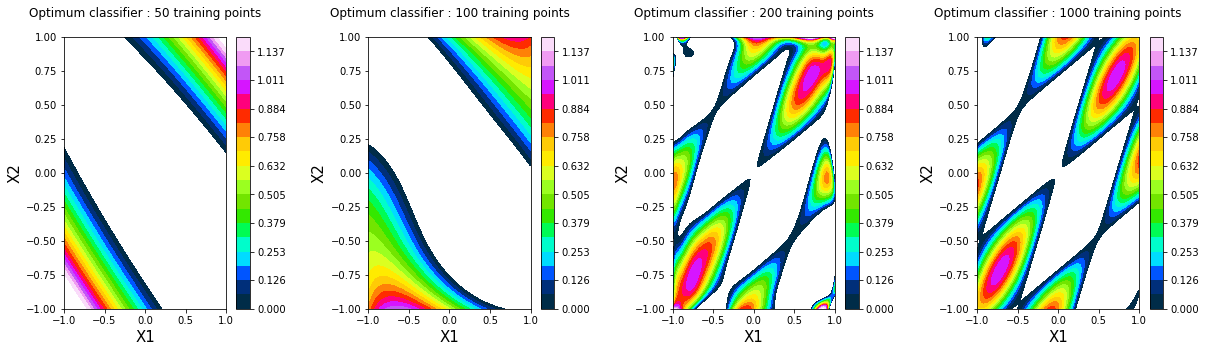

In [14]:
# Cell type : CodeWrite 
def plot_ridge_regress_train(X_train, Y_train, degree=1, reg_param=0.01): 
    """
    Trains a ridge regression model using the given training data.

    Args:
        X_train (ndarray): A 2D numpy array of shape (n_samples, 2) containing the input features of the training data.
        Y_train (ndarray): A 1D numpy array of shape (n_samples,) containing the output targets of the training data.
        degree (int, optional): The degree of the polynomial features to be used in the model. Default is 1.
        reg_param (float, optional): The regularization parameter. Default is 0.01.

    Returns:
        w (ndarray): A 1D numpy array of shape (n_features,) containing the learned model parameters.
    """
    #Feature matrix
    phi = []
    for i in range(degree + 1):
        for j in range(degree + 1):
            if (i + j) <= degree:
                phi.append((X_train[:, 0] ** i) * (X_train[:, 1] ** j))
    
    phi = np.array(phi).T
    K = phi @ phi.T
    I = np.eye(K.shape[0])
    w = phi.T @ np.linalg.inv(K + reg_param * I) @ Y_train
    
    return w    

def plot_ridge_regress_predict(X_test, wt_vector, degree=1):
    """
    Predicts the output targets for the given test data using a previously trained ridge regression model.

    Args:
        X_test (ndarray): A 2D numpy array of shape (n_samples, 2) containing the input features of the test data.
        wt_vector (ndarray): A 1D numpy array of shape (n_features,) containing the learned model parameters.
        degree (int, optional): The degree of the polynomial features used in the model. Default is 1.

    Returns:
        Y_test_pred (ndarray): A 1D numpy array of shape (n_samples,) containing the predicted output targets of the test data.
    """
    # Feature matrix
    phi = []
    for i in range(degree + 1):
        for j in range(degree + 1):
            if (i + j) <= degree:
                phi.append((X_test[:, 0] ** i) * (X_test[:, 1] ** j))
    
    phi = np.array(phi).T
    Y_test_pred = phi @ wt_vector
    
    return Y_test_pred

def visualise_polynomial_2d(wt_vector, degree, title=""):
    """
    Plots a 2D contour map of the polynomial function defined by the given weights and degree.

    Args:
        wt_vector (ndarray): A 1D numpy array of shape (n_features,) containing the learned model parameters.
        degree (int): The degree of the polynomial features used in the model.
        title (str, optional): The title of the plot. Default is an empty string.

    Returns:
        None
    """
    X, Y = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
    Z = np.zeros([100, 100])
    for i in range(len(X)):
        Z[i, :] = plot_ridge_regress_predict(np.array([X[i, :], Y[i, :]]).T, wt_vector, degree)
    
    plt.contourf(X, Y, Z, levels=np.linspace(0., 1.2, 20), cmap='gist_ncar')
    plt.title(title)
    plt.colorbar()
    
def create_mse_arrays(deg, lamda):
    """
    Creates a list of zero-filled 2D numpy arrays for storing mean squared errors.

    Args:
        deg (list): A list of integers specifying the polynomial degrees to be used.
        lamda (list): A list of floats specifying the regularization parameters to be used.

    Returns:
        mse_arrays (list): A list of 2D numpy arrays of shape (len(deg), len(lamda)) filled with zeros.
    """
    mse_arrays = []
    for i in range(8):
        mse_array = np.zeros([len(deg), len(lamda)])
        mse_arrays.append(mse_array)
    
    return mse_arrays

def calculate_wt_pred_mse(X,Y,x,y, deg, regu_param):
    """
    Trains a ridge regression model using the given training data and regularization parameter, 
    and calculates the model's predicted output, weight vector, and mean squared error (MSE) 
    using the given test data and polynomial degree.

    Args:
        X (ndarray): A 2D numpy array of shape (n_train_samples, 2) containing the input features of the training data.
        Y (ndarray): A 1D numpy array of shape (n_train_samples,) containing the output targets of the training data.
        x (ndarray): A 2D numpy array of shape (n_test_samples, 2) containing the input features of the test data.
        y (ndarray): A 1D numpy array of shape (n_test_samples,) containing the true output targets of the test data.
        deg (int): The degree of the polynomial features used in the model.
        regu_param (float): The regularization parameter used in the ridge regression.

    Returns:
        wt_vector (ndarray): A 1D numpy array of shape (n_features,) containing the learned model parameters.
        Y_test_pred (ndarray): A 1D numpy array of shape (n_test_samples,) containing the predicted output targets of the test data.
        mse (float): The mean squared error between the predicted and true output targets of the test data.
    """
    wt_vector = plot_ridge_regress_train(X,Y,deg,regu_param)
    Y_test_pred = plot_ridge_regress_predict(x,wt_vector,deg)
    mse = ((Y_test_pred - y)**2).mean() 
    return wt_vector,Y_test_pred,mse

def printPlot(position,opt_wt_vec, sample_size, pad, font, deg):
    """
    Plots the 2D polynomial classifier visualisation for the given weight vector, polynomial degree, 
    and training sample size at the given subplot position.

    Args:
        position (int): The position of the subplot in the 1x4 grid of subplots.
        opt_wt_vec (ndarray): A 1D numpy array of shape (n_features,) containing the learned model parameters.
        sample_size (int): The number of training samples used to train the model.
        pad (float): The padding distance of the subplot title from the top of the plot in points.
        font (int): The font size of the x and y axis labels.
        deg (int): The degree of the polynomial features used in the model.

    Returns:
        None.
    """
    plt.subplot(1,4,position)
    visualise_polynomial_2d(opt_wt_vec, deg, title=f"Optimum classifier : {sample_size} training points")
    plt.title(f'Optimum classifier : {sample_size} training points', pad=pad)
    plt.xlabel('X1',fontsize=font)
    plt.ylabel('X2',fontsize=font)
    
def verifyingResult(MSE_1,MSE_2,MSE_3,MSE_4,MSE_5,MSE_6,MSE_7,MSE_8):
    """
    Prints the mean squared errors (MSEs) for different numbers of data points and datasets.

    Args:
        MSE_1 (ndarray): A 1D numpy array of shape (n_trials,) containing the MSEs for the 50 test data points.
        MSE_2 (ndarray): A 1D numpy array of shape (n_trials,) containing the MSEs for the 100 test data points.
        MSE_3 (ndarray): A 1D numpy array of shape (n_trials,) containing the MSEs for the 200 test data points.
        MSE_4 (ndarray): A 1D numpy array of shape (n_trials,) containing the MSEs for the 1000 test data points.
        MSE_5 (ndarray): A 1D numpy array of shape (n_trials,) containing the MSEs for the 50 train data points.
        MSE_6 (ndarray): A 1D numpy array of shape (n_trials,) containing the MSEs for the 100 train data points.
        MSE_7 (ndarray): A 1D numpy array of shape (n_trials,) containing the MSEs for the 200 train data points.
        MSE_8 (ndarray): A 1D numpy array of shape (n_trials,) containing the MSEs for the 1000 train data points.

    Returns:
        None.
    """
    print("MSE for different numbers of data points and datasets:")
    print("------------------------------------------------------")
    print(f"50 Points - TEST Dataset:   \n {MSE_1}")
    print(f"50 Points - TRAIN Dataset:  \n {MSE_5}")
    print(f"100 Points - TEST Dataset:  \n {MSE_2}")
    print(f"100 Points - TRAIN Dataset: \n {MSE_6}")
    print(f"200 Points - TEST Dataset:  \n {MSE_3}")
    print(f"200 Points - TRAIN Dataset: \n {MSE_7}")
    print(f"1000 Points - TEST Dataset: \n {MSE_4}")
    print(f"1000 Points - TRAIN Dataset: \n {MSE_8}")


#Loading the dataset
Data = np.load('../../Data/dataset4_1.npz')
X_train, Y_train, X_test, Y_test = Data['arr_0'], Data['arr_1'], Data['arr_2'], Data['arr_3']

#All possibles values for degree and regularization penalty parameter
deg = [1,2,4,8,16]
lamda = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]

#Training dataset with different number of samples selected
X_train1,Y_train1 = X_train[:50,:],Y_train[:50]
X_train2,Y_train2 = X_train[:100,:],Y_train[:100]
X_train3,Y_train3 = X_train[:200,:],Y_train[:200]
X_train4,Y_train4 = X_train[:1000,:],Y_train[:1000]

#Initialising the MSE matrix
MSE_Arr = create_mse_arrays(deg, lamda)
MSE_1, MSE_2, MSE_3, MSE_4, MSE_5, MSE_6, MSE_7, MSE_8 = MSE_Arr[0],MSE_Arr[1],MSE_Arr[2],MSE_Arr[3],MSE_Arr[4],MSE_Arr[5],MSE_Arr[6],MSE_Arr[7]

#Calculating MSE for each combination of degree and reg_param
for i in range(len(deg)):
    for j in range(len(lamda)):        
        degree = deg[i]
        regu_param = lamda[j]   
        
        # Testing MSE  
        wt_vector1, Y_test_pred1, MSE_1[i,j] = calculate_wt_pred_mse(X_train1,Y_train1,X_test,Y_test, degree, regu_param)
        wt_vector2, Y_test_pred2, MSE_2[i,j] = calculate_wt_pred_mse(X_train2,Y_train2,X_test,Y_test, degree, regu_param)
        wt_vector3, Y_test_pred3, MSE_3[i,j] = calculate_wt_pred_mse(X_train3,Y_train3,X_test,Y_test, degree, regu_param)
        wt_vector4, Y_test_pred4, MSE_4[i,j] = calculate_wt_pred_mse(X_train4,Y_train4,X_test,Y_test, degree, regu_param)
        
        # Training MSE
        wt_vector5, Y_test_pred5, MSE_5[i,j] = calculate_wt_pred_mse(X_train1,Y_train1,X_train,Y_train, degree, regu_param)
        wt_vector6, Y_test_pred6, MSE_6[i,j] = calculate_wt_pred_mse(X_train2,Y_train2,X_train,Y_train, degree, regu_param)
        wt_vector7, Y_test_pred7, MSE_7[i,j] = calculate_wt_pred_mse(X_train3,Y_train3,X_train,Y_train, degree, regu_param)
        wt_vector8, Y_test_pred8, MSE_8[i,j] = calculate_wt_pred_mse(X_train4,Y_train4,X_train,Y_train, degree, regu_param)
                
# Calculating the weight vector for the optimum classifiers, for different datasets     
opt_wt_vector1 = plot_ridge_regress_train(X_train1, Y_train1, 2, 1e-1)
opt_wt_vector2 = plot_ridge_regress_train(X_train2, Y_train2, 4, 1e-7)
opt_wt_vector3 = plot_ridge_regress_train(X_train3, Y_train3, 16, 1e-9)
opt_wt_vector4 = plot_ridge_regress_train(X_train4, Y_train4, 16, 1e-9)

#Plot the graph
plt.rcParams['figure.figsize'] = [20,5]
fig = plt.figure()
printPlot(1,opt_wt_vector1, 50, 20, 15,2)
printPlot(2,opt_wt_vector2, 100, 20, 15,4)
printPlot(3,opt_wt_vector3, 200, 20, 15,16)
printPlot(4,opt_wt_vector4, 1000, 20, 15,16)
plt.subplots_adjust(wspace = 0.50)

#Verifying the result for display - Uncomment if need to review the result
#verifyingResult(MSE_1,MSE_2,MSE_3,MSE_4,MSE_5,MSE_6,MSE_7,MSE_8)

** Cell type : TextWrite **
### Observations: 
1. The model's ability to learn increases as the size of training data increases. This can be observed in a decrease in test MSE over various training datasets. The MSE for the best classifier of each case (50, 100, 200, and 1000 data points) has been displayed in the table along with the corresponding training MSE. 
2. A lower testing MSE does not necessarily mean that a curve fits well. This is because we can run into the case of overfitting, where we achieve extremely low values of MSE for the training data but fail to give a good generalization for the rest of the data.

### Best Model:
| Sample Size       |    $\lambda$ |   Degree      | Best Test MSE  |
| :---:             |   :-----:    |:----:         |  :----:        | 
|  50               | 1e-1         | 2             |0.1567352       |
|  100              | 1e-7         | 4             |0.14277575      |
|  200              | 1e-9         | 16            |0.03715041      |
|  1000             | 1e-9         | 16            |0.00119791      |


### Training with 50 datapoints:

#### Test MSE:
| Degree\ $\lambda$ |    1e-9    |    1e-7   |     1e-5  |   1e-3    |   1e-1    |   1e1         | 
| :---:             |   :-----:  |:----:     |  :----:   |  :----:   |  :---:    |  :---:        |
|  1                | 0.3012667 | 0.3012668|0.3012667 |0.3012624 |0.3008382 |0.2783506     |
|  2                | 0.1578999 | 0.1578998|0.1578998 |0.1578863 |0.1567352|0.2082236     |
|  4                | 0.1573339 | 0.1573339|0.1573329 |0.1572427 |0.1618263 |0.2082236     |
|  8                | 0.2376e+03 | 0.1725e+03|0.1859+e02 |0.9902507 |0.1651557 |0.1939185     |
|  16               | 0.2505e+03 | 0.2320e+03|0.6669+e02 |2.3373084 |0.2039614 |0.1960573     |



#### Train MSE:
| Degree\ $\lambda$ |    1e-9    |    1e-7   |     1e-5  |   1e-3    |   1e-1    |   1e1         | 
| :---:             | :-----:    |:----:     |:----:     |:----:     | :---:     |:---:          |
|  1                | 0.27426128 | 0.27426132|0.27426189 |0.27425742 | 0.27387387|0.2538510     |
|  2                | 0.15639985 | 0.15639985|0.15639964 |0.15638070 | 0.1547003|0.1915057     |
|  4                | 0.1554163 | 0.1554162|0.1554153 |0.155311 | 0.15767|0.18084     |
|  8                | 184.691 | 131.838|14.14 |0.78045 | 0.1614|0.1784     |
|  16               | 195.674 | 172.67|49.58 |1.83051 | 0.19669|0.18027     |


### Training with 100 datapoints:


#### Test MSE:
| Degree\ $\lambda$ |    1e-9    |    1e-7   |     1e-5  |   1e-3    |   1e-1    |   1e1         | 
| :---:             | :-----:    |:----:     |:----:     | :----:    | :---:     |:---:          |
|  1                | 0.27314881 | 0.27314864|0.27314863 | 0.27314798| 0.27308304|0.26862154     |
|  2                | 0.1532099 | 0.15320993|0.1532099 | 0.15320678| 0.15291576|0.17570948     |
|  4                | 0.14277585 | 0.14277575|0.14277607 | 0.14280764| 0.14602043|0.16898019     |
|  8                | 0.71291665 | 0.71131964|0.58075914 | 0.20363826| 0.16262758|0.17116844     |
|  16               | 54.08000973 | 11.77041999|23.41658886 | 0.41784851| 0.18835914|0.17415997     |

#### Train MSE:
| Degree\ $\lambda$ |    1e-9    |    1e-7   |     1e-5  |   1e-3    |   1e-1    |   1e1         | 
| :---:             | :-----:    |:----:     |:----:     |:----:     | :---:     |:---:          |
|  1                | 0.24924468 | 0.2492446|0.2492446 |0.24924403 | 0.24918733|0.2453317     |
|  2                | 0.15034659 | 0.1503466|0.15034655 |0.15034165 | 0.14987479|0.16364578     |
|  4                | 0.14219318 | 0.14219308|0.14219312 |0.14219808 | 0.14343342|0.15771009     |
|  8                | 0.5826159 | 0.58134699|0.47778596 |0.17302199 | 0.15362974|0.15941299     |
|  16               | 40.88530255 | 6.4214023|8.54493033 |0.27611186 | 0.17611051|0.16158112     |



### Training with 200 datapoints:


#### Test MSE:
| Degree\ $\lambda$ |    1e-9    |    1e-7   |     1e-5  |   1e-3    |   1e-1    |   1e1         | 
| :---:             | :-----:    | :----:    | :----:    | :----:    | :---:     | :---:         |
|  1                | 0.2676629 | 0.26766305|0.26766305 |0.26766288 |0.26764571 |0.26622547     |
|  2                | 0.14578072 | 0.14578065|0.14578065 |0.14578035 |0.14575448 |0.15868223     |
|  4                | 0.13117103 | 0.13117097|0.1311709 |0.13116415 |0.13083053 |0.15708512     |
|  8                | 0.13736248 | 0.13735918|0.13698205 |0.11818259 |0.11396536 |0.15645118     |
|  16               | 0.03715041 | 0.08371022|0.17080666 |0.0869037 |0.11121403 |0.15224401     |


#### Train MSE:
| Degree\ $\lambda$ |    1e-9    |    1e-7   |     1e-5  |   1e-3    |   1e-1    |   1e1         | 
| :---:             | :-----:    |  :----:   |  :----:   |  :----:   |   :---:   |  :---:        |
|  1                | 0.24607245 | 0.24607271|0.24607272 | 0.24607257| 0.24605756|0.24480824     |
|  2                | 0.14273851 | 0.1427385|0.14273849 | 0.14273747| 0.14263977|0.15041158     |
|  4                | 0.13227258 | 0.13227259|0.13227243 | 0.13225662| 0.13110941|0.14861957     |
|  8                | 0.11277981 | 0.11277783|0.11256118 | 0.10231635| 0.11410717|0.1477115     |
|  16               | 0.01853434 | 0.03777313|0.05960355 | 0.07405987| 0.108204|0.14398146     |

### Training with 1000 datapoints:

#### Test MSE:
| Degree\ $\lambda$ |    1e-9    |    1e-7   |     1e-5  |   1e-3    |   1e-1    |   1e1         | 
| :---:             | :-----:    | :----:    | :----:    | :----:    |  :---:    | :---:         |
|  1                | 0.2625346 | 0.26253465|0.26591434 |0.26253465 | 0.2625346|0.2625303     |
|  2                | 0.1424292 | 0.14242932|0.14242932 |0.14242945 | 0.14244207|0.14451885     |
|  4                | 0.12707961 | 0.12707963|0.12707964 |0.12708121 | 0.12724209|0.14093659     |
|  8                | 0.08481384 | 0.08481261|0.08480025 |0.08391324 | 0.09782269|0.13498892     |
|  16               | 0.00119791 | 0.00149006|0.01095719 |0.04965813 | 0.0907374|0.1278209     |

#### Train MSE:
| Degree\ $\lambda$ |    1e-9    |    1e-7   |     1e-5  |   1e-3    |   1e-1    |   1e1         | 
| :---:             | :-----:    |  :----:   |  :----:   |  :----:   |   :---:   |  :---:        |
|  1                | 2.40728219e-01 | 2.40728219e-01|2.40728219e-01 |2.40728219e-01 | 2.40728219e-01|2.40728718e-01     |
|  2                | 1.38824103e-01 | 1.38824103e-01|1.38824103e-01 |1.38824103e-01 | 1.38824212e-01|1.39718023e-01     |
|  4                | 1.25017242e-01 | 1.25017242e-01|1.25017242e-01 |1.25017243e-01 | 1.25025116e-01|1.34172029e-01     |
|  8                | 7.67428545e-02 |7.67428535e-02|7.67428671e-02 |7.68462164e-02 | 9.48380319e-02|1.28438228e-01     |
|  16               | 2.54867334e-05 | 4.45126848e-04|6.53349064e-03 |3.84153399e-02 | 8.49925763e-02|1.21687324e-01     |

** Cell type : TextRead **

# Problem 4 : Bayesian Regression


Consider the 2-dimensional regression dataset with 4 training points given below:

(x1,   x2)   : y

(1.0, 2.0)  : 5.1

(2.0, 2.1)  : 6.1

(0.6, 1.5)  : 4.2

(1.1, 0.9)  : 2.9

Assume $Y_i=W.X_i + \epsilon_i$, where W is a random variable with prior distribution given by a Gaussian with mean $[\mu_1, \mu_2]$ and covariance given by $\tau^2*I$. The random variables $\epsilon_i$ are independent, and normally distributed with variance $\sigma^2$. For each of the settings below, give the contours of the prior distribution and posterior distribution of $W$ given the 4 data points. Plot using a contour map.

1. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=1$
2. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=1$
3. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=10$
4. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=10$
5. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=1$
6. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=1$
7. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=10$
8. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=10$

Repeat all the above experiments also with 400 data points, which are simply the 4 data points above repeated 100 times each.

A total of 16\*2 contour plots are to be given. 

Summarise your findings and conclusions in the final textcell.












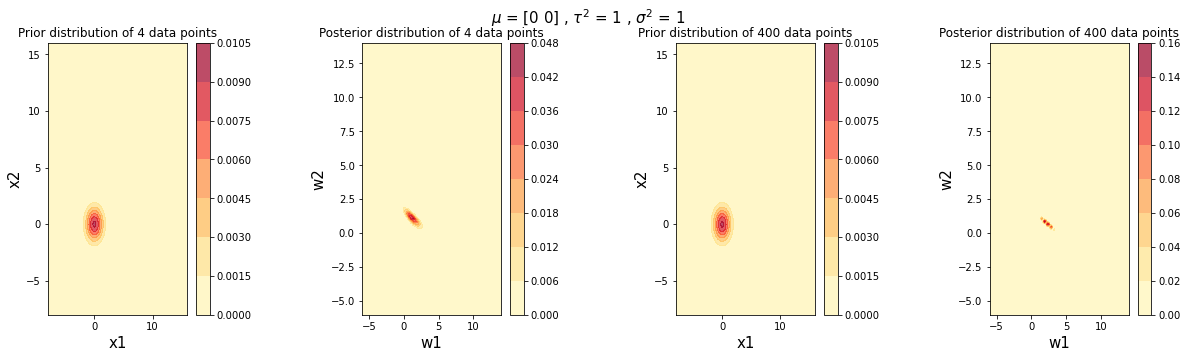

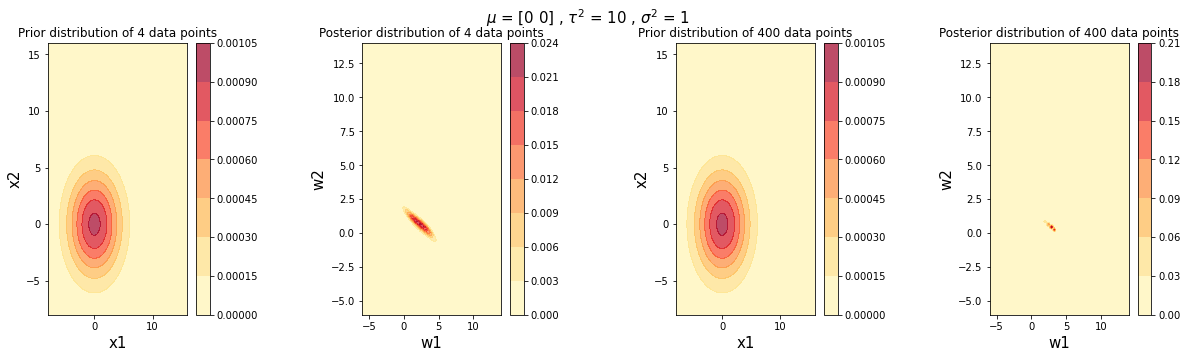

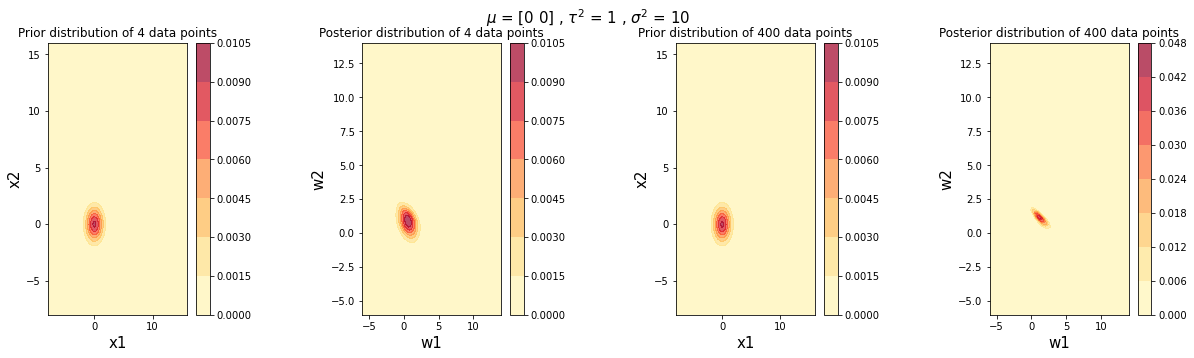

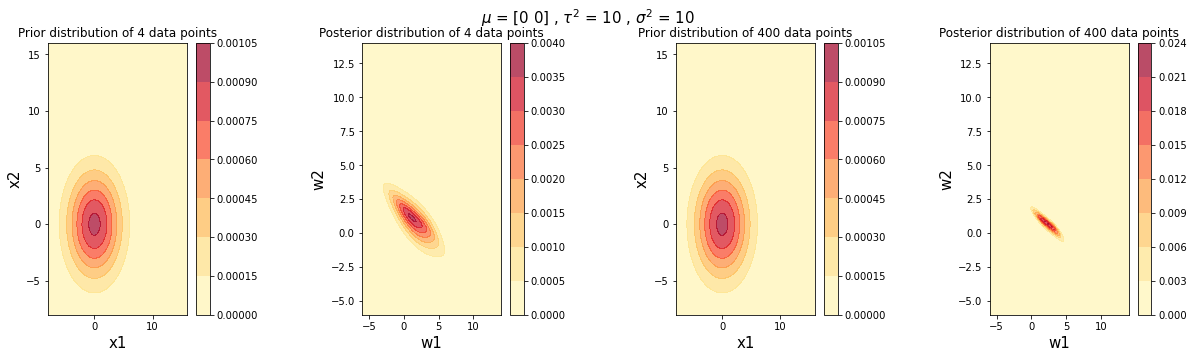

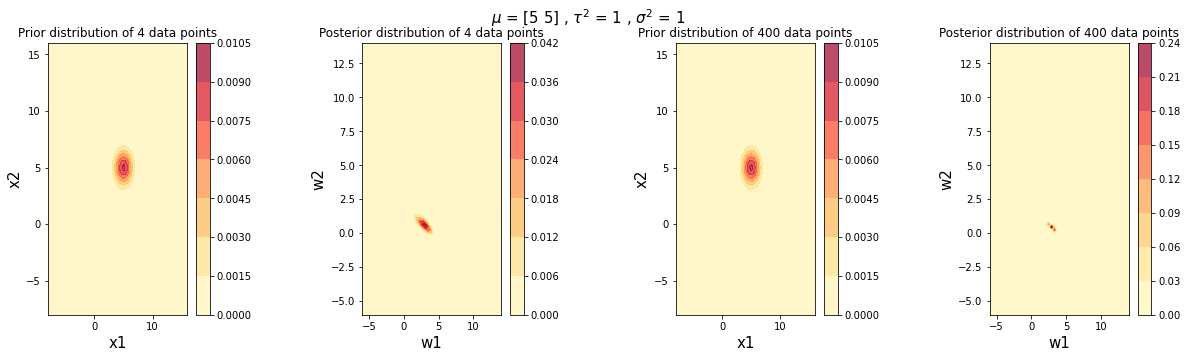

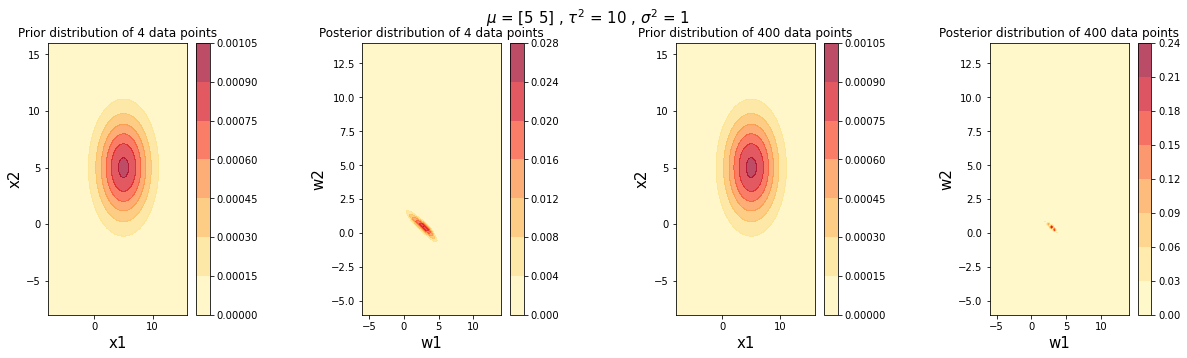

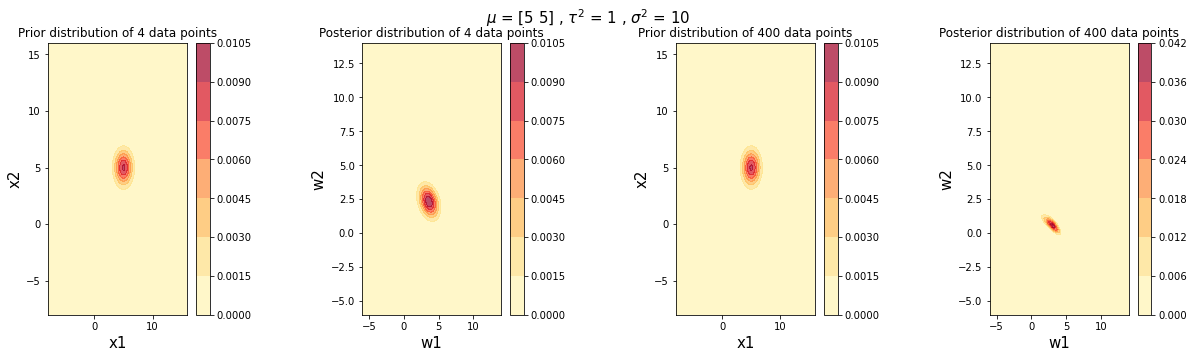

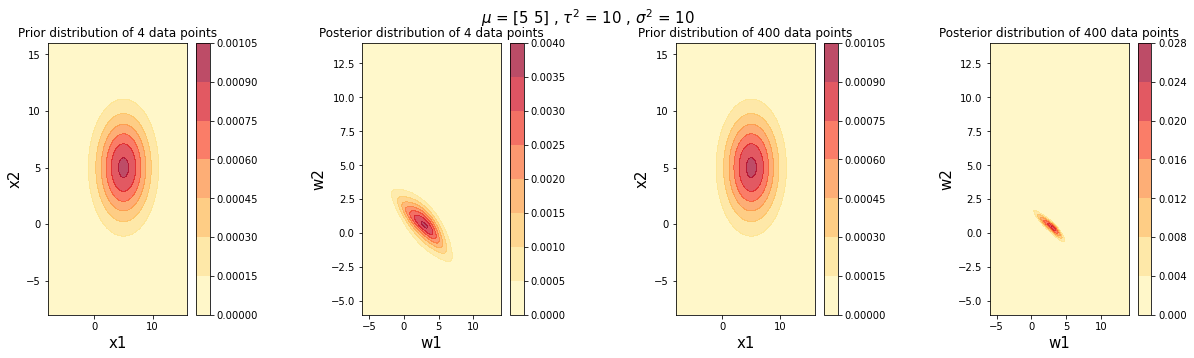

In [10]:
# Cell type : CodeWrite 

cMap, alpha_plot = 'YlOrRd',0.7 

def plot_graph(fig,ax,X1,X2,data,cMap,alpha_plot,loc,xlbl,ylbl,font,title):
    """Plot a contour plot on a given axis object with provided data and formatting.

    Args:
        fig (matplotlib.figure.Figure): Figure to plot on.
        ax (matplotlib.axes.Axes): Axis object to plot on.
        X1 (ndarray): Array of values for the x-axis.
        X2 (ndarray): Array of values for the y-axis.
        data (ndarray): 2D array of values to plot on the contour plot.
        cmap (str or Colormap): The colormap to use for the contour plot.
        alpha_plot (float): The alpha value for the plotted contour.
        loc (int): The location of the subplot.
        xlbl (str): The label for the x-axis.
        ylbl (str): The label for the y-axis.
        font (int): The font size for the axis labels and title.
        title (str): The title for the plot.

    Returns:
        None
    """
    plt_1 = ax[loc].contourf(X1,X2,data/data.sum(),alpha = alpha_plot,cmap=cMap)              
    fig.colorbar(plt_1, ax=ax[loc]) 
    ax[loc].set_xlabel(xlbl,fontsize = font)
    ax[loc].set_ylabel(ylbl,fontsize = font)       
    ax[loc].title.set_text(title) 

X1,Y1 = np.array([[1,2],[2,2.1],[0.6,1.5],[1.1,2.9]]),np.array([5.1, 6.1, 4.2, 2.9]).T
X2_1,X2_2,X2_3,X2_4 = X1[0,:]*np.ones([100,X1.shape[1]]),X1[1,:]*np.ones([100,X1.shape[1]]),X1[2,:]*np.ones([100,X1.shape[1]]),X1[3,:]*np.ones([100,X1.shape[1]])
Y2_1,Y2_2,Y2_3,Y2_4 = Y1[0]*np.ones([100,]),Y1[1]*np.ones([100,]),Y1[2]*np.ones([100,]),Y1[3]*np.ones([100,]) 
X2,Y2 = np.vstack([X2_1,X2_2,X2_3,X2_4]),np.hstack([Y2_1,Y2_2,Y2_3,Y2_4])

#Initializing all possibles values of mean, variance and covariance matrix
mu_1,variance,tau_sqr = np.array([0,5]), np.array([1,10]), np.array([1,10])

#Initiating grid for displaying the prior value
XAxis1,XAxis2 = np.meshgrid(np.linspace(-8,16,100), np.linspace(-8,16,100))
Zeros_1 = np.zeros(XAxis1.shape)
#Initiating grid for displaying the posterior value
Weight_1, Weight_2 = np.meshgrid(np.linspace(-6,14,100), np.linspace(-6,14,100))
Zeros_2_4,Zeros_2_400 = np.zeros(Weight_1.shape), np.zeros(Weight_1.shape)

#Figure size for plotting
plt.rcParams['figure.figsize'] = [20,5]
#Plotting and calculation of the distribution
for mu_2 in mu_1:
    for var in variance:
        for tau_sq in tau_sqr:
            mu = np.array([mu_2,mu_2])            
            #Calculating Priror Probablity
            for i in range(len(XAxis1)):
                for j in range(len(XAxis2)):
                    x = np.array([XAxis1[i,j],XAxis2[i,j]])
                    Zeros_1[i,j] = np.sqrt(1/(2*np.pi*np.linalg.det(tau_sq*np.identity(mu.shape[0]))))*np.exp((-0.5)*np.matmul(np.matmul((x-mu),np.linalg.inv(tau_sq*np.identity(mu.shape[0]))),(x-mu)))
            #Calculating Posterior Probablity
            for i in range(len(Weight_1)):
                for j in range(len(Weight_2)):
                    w = np.array([Weight_1[i,j],Weight_2[i,j]])
                    #Calculation for 4 Points
                    Zeros_2_4[i,j] = np.exp((-0.5)*((1/var)*np.linalg.norm((Y1-np.matmul(X1,w.T))**2) + (1/tau_sq)*np.linalg.norm((w-mu))**2))
                    #Calculation for 400 Points
                    Zeros_2_400[i,j] = np.exp((-0.5)*((1/var)*np.linalg.norm((Y2-np.matmul(X2,w.T))**2) + (1/tau_sq)*np.linalg.norm((w-mu))**2))
                     
            fig_plot, ax_plot = plt.subplots(1,4)            
            fig_plot.suptitle(f'$\mu$ = {mu} , $\\tau^2$ = {tau_sq} , $\sigma^2$ = {var}',fontsize=15) 
            plot_graph(fig_plot,ax_plot,XAxis1,XAxis2,Zeros_1,cMap,alpha_plot,0,'x1','x2',15,'Prior distribution of 4 data points')
            plot_graph(fig_plot,ax_plot,Weight_1,Weight_2,Zeros_2_4,cMap,alpha_plot,1,'w1','w2',15,'Posterior distribution of 4 data points')
            plot_graph(fig_plot,ax_plot,XAxis1,XAxis2,Zeros_1,cMap,alpha_plot,2,'x1','x2',15,'Prior distribution of 400 data points')
            plot_graph(fig_plot,ax_plot,Weight_1,Weight_2,Zeros_2_400,cMap,alpha_plot,3,'w1','w2',15,'Posterior distribution of 400 data points')           
            fig_plot.subplots_adjust(wspace = 0.8)  

** Cell type : TextWrite **
### Observations: 
1. The plot used to calculate a prior distribution does not depend on the data. It only depends on $\tau^2$ and the mean. Higher $\tau^2$ indicates higher variance in the data.
2. The posterior distribution for a given model depends on how large the variance in the data is. If the variance in the data is low, then the prior distribution becomes significant and therefore the posterior distribution depends more on its prior distribution. For high variance in the data, plots don't change much with different values of $\tau^2$ and $\mu$ but they do depend more on these two parameters when $\sigma^2$ is large.
3. As the number of data points increases, the posterior distributions become more dependent on the data. This is why different plots are obtained for different size datasets even when the larger dataset is simply a repetition of the smaller dataset.
4.The posterior distribution is also a Gaussian distribution.

# 6. Decision Tree

Write code for learning decision tree below. Take as an argument a hyperparameter on what size node to stop splitting. Use a part of training set as validation set.

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For all four data sets  report the best node size to stop splitting. Report the training and test zero-one error for those hyperparameters.

For datasets A and B, also illustrate the learned classifier. Do this in the last codeWrite cell for this question.

Important: Think about how you will represent a decision tree. (Possible soln: Store as a list of tuples containing node position, attribute to split, threshold, class to classifiy (if leaf node) )


In [11]:
# CodeWrite cell
# Write Decision tree classifier from scratch, 
# write only functions here (you may write extra functions here if you wish)
def train_decision_tree(X, Y, num_nodes_stop=1, criterion='accuracy',node_number=0):
      
    """ Returns a decision tree trained on X and Y. 
    Stops splitting nodes when a node has hit a size of "num_nodes_stop" or lower.
    Split criterion can be either 'accuracy' or 'entropy'.
    Returns a tree (In whatever format that you find appropriate)
    """      
    n = X.shape[0]    
    tree = []  
    if n == 0:
        node_number += 1
        node = (node_number, None, None, 1)
        tree.append(node)
        return tree, node_number
    elif np.sum(Y[Y==1]) == n:
        node_number += 1
        node = (node_number, None, None, 1)
        tree.append(node)
        return tree, node_number
    elif np.sum(Y[Y==-1]) == n:
        node_number += 1
        node = (node_number, None, None, -1)
        tree.append(node)
        return tree, node_number
    elif n < num_nodes_stop:
        node_number += 1
        if np.sum(Y[Y==1])/n > 0.5:
            node = (node_number, None, None, 1)
        else:
            node = (node_number, None, None, -1)
        tree.append(node)
        return tree, node_number
    else:
        X_left, Y_left, X_right, Y_right, opt_attribute, opt_threshold = split_dataset(X, Y, criterion)
        node_number += 1
        node = (node_number, opt_attribute, opt_threshold, None)
        tree.append(node)
        if X_left.shape[0] != 0 and X_right.shape[0] != 0:
            left_tree, node_number = train_decision_tree(X_left, Y_left, num_nodes_stop, criterion, node_number)
            right_tree, node_number = train_decision_tree(X_right, Y_right, num_nodes_stop, criterion, node_number)
            return tree + left_tree + right_tree, node_number
        else:
            node_number +=1
            if X_left.shape[0] != 0:
                if np.sum(Y_left[Y_left==1])/X_left.shape[0] > 0.5:
                    node1 = (node_number, None, None, 1)
                    node2 = (node_number+1, None, None, -1)
                else:
                    node1 = (node_number, None, None, -1)
                    node2 = (node_number+1, None, None, 1)
            else:
                if np.sum(Y_right[Y_right==1])/X_right.shape[0] > 0.5:
                    node1 = (node_number, None, None, -1)
                    node2 = (node_number+1, None, None, 1)
                else:
                    node1 = (node_number, None, None, 1)
                    node2 = (node_number+1, None, None, -1)
            nodes = [node1, node2]
            return tree + nodes, node_number+1
    

def eval_decision_tree(tree, test_X):
    """ Takes in a tree, and a bunch of instances X and 
    returns the tree predicted values at those instances."""
    n = test_X.shape[0]    
    Y_pred = np.ones((n,))    
    for i in range(n):
        exit = 0
        for node in tree:
            if exit == 0:
                if node[3] == None:
                    if test_X[i, node[1]] <= node[2]:
                        num_split_nodes = 0
                        num_leaf_nodes = 0
                        continue
                    else:
                        exit = 1
                        num_split_nodes = 0
                        num_leaf_nodes = 0
                        continue
                else:
                    Y_pred[i] = node[3]
                    break
            else:
                if node[3] == None:
                    num_split_nodes += 1
                    continue
                else:
                    num_leaf_nodes += 1
                    if num_leaf_nodes > num_split_nodes:
                        exit = 0
                        continue
                    else:
                        continue            
    return Y_pred

def get_max(X):
    """
    Returns the count of the most frequently occurring element in the input array.
    Parameters:
        X (ndarray): Input array.
    Returns:
        int: Count of the most frequently occurring element in the input array.
    """
    if len(X) == 0:
        return 0
    u,c = np.unique(X,return_counts=True)
    return c[c.argmax()]

def H(p):
    """
    Computes the binary entropy of a Bernoulli random variable with probability of success p.    
    Parameters:
    -----------
    p : float
        Probability of success of the Bernoulli random variable. Must satisfy 0 <= p <= 1.    
    Returns:
    --------
    float
        The binary entropy of the Bernoulli random variable.        
    Raises:
    -------
    ValueError
        If p is outside the range [0, 1].
    """
    return (p * np.log2(1/p) + (1-p) * np.log2(1/(1-p))) if 1e-2 <= p <= 1 - 1e-2 else 0

def split_dataset(X, Y, criterion):
    '''
    Splits a dataset into two subsets based on the specified criterion.
    Parameters:
    X (numpy array): input data of shape (n_samples, n_features)
    Y (numpy array): target values of shape (n_samples,)
    criterion (str): the criterion to use for the split. Must be either 'accuracy' or 'entropy'

    Returns:
    X_left (numpy array): input data of left subset
    Y_left (numpy array): target values of left subset
    X_right (numpy array): input data of right subset
    Y_right (numpy array): target values of right subset
    opt_attribute (int): index of optimal attribute to split on
    opt_threshold (float): threshold value for optimal split
    '''
    if criterion not in ['accuracy', 'entropy']:
        print(f'{criterion} is not a valid criterion')
        criterion = 'accuracy'
    thres_split=10
    nrows, ncols = X.shape
    max_metric_gain = 0 if criterion == 'accuracy' else 100000
    for i in range(ncols):
        X_crnt = X[:, i]
        for j in np.linspace(np.min(X_crnt), np.max(X_crnt), thres_split):
            yright = Y[X_crnt>=j]
            yleft = Y[X_crnt<j]
            if criterion == 'accuracy':
                metric = (get_max(yright) + get_max(yleft)) / len(Y)
            else:
                pr = len(yright) / len(Y)
                pl = len(yleft) / len(Y)
                mr = get_max(yright)
                ml = get_max(yleft)
                qr = mr / len(yright) if len(yright) > 0 else 0
                ql = ml / len(yleft) if len(yleft) > 0 else 0
                metric = pl * H(ql) + pr * H(qr)
                
            if (criterion == 'accuracy' and metric > max_metric_gain) or (criterion == 'entropy' and metric < max_metric_gain):
                max_metric_gain = metric
                opt_attribute = i
                opt_threshold = j
                
    X_left = X[X[:, opt_attribute] < opt_threshold]
    Y_left = Y[X[:, opt_attribute] < opt_threshold]
    X_right = X[X[:, opt_attribute] >= opt_threshold]
    Y_right = Y[X[:, opt_attribute] >= opt_threshold]
    
    return X_left, Y_left, X_right, Y_right, opt_attribute, opt_threshold
    
    

def load_data(filename):
    """
    Load and preprocess data from a NumPy file.    
    Parameters
    ----------
    filename : str
        The name of the file to load.

    Returns
    -------
    tuple of ndarrays
        A tuple containing the following arrays:
        - X_train: a 2D array of training input data
        - Y_train: a 1D array of training output data
        - X_test: a 2D array of test input data
        - Y_test: a 1D array of test output data
        - X_val: a 2D array of validation input data
        - Y_val: a 1D array of validation output data
        - X_train_for_val: a 2D array of training input data without validation samples
        - Y_train_for_val: a 1D array of training output data without validation samples
    """
    data = np.load(filename)
    X_train = data['arr_0']
    Y_train = data['arr_1']
    X_test = data['arr_2']
    Y_test = data['arr_3']
    np.random.seed(10)
    indices = np.random.choice(range(X_train.shape[0]), X_train.shape[0] // 5)
    X_val = X_train[indices,:]
    X_train_for_val = np.delete(X_train, indices, axis=0)
    Y_val = Y_train[indices]
    Y_train_for_val = np.delete(Y_train, indices, axis=0)
    return X_train, Y_train, X_test, Y_test, X_val, Y_val, X_train_for_val, Y_train_for_val

def print_result(dataset_Name,X_train, Y_train, X_test, Y_test, X_val, Y_val, X_train_for_val, Y_train_for_val,display_result=False):
    """
    Print the training and test accuracy and loss of decision trees trained on a dataset using different stopping criteria.

    Parameters:
    ----------
    - dataset_Name: str, name of the dataset
    - X_train: numpy array of shape (n_train, d), features of training set
    - Y_train: numpy array of shape (n_train,), labels of training set
    - X_test: numpy array of shape (n_test, d), features of test set
    - Y_test: numpy array of shape (n_test,), labels of test set
    - X_val: numpy array of shape (n_val, d), features of validation set
    - Y_val: numpy array of shape (n_val,), labels of validation set
    - X_train_for_val: numpy array of shape (n_train - n_val, d), features of training set for validation
    - Y_train_for_val: numpy array of shape (n_train - n_val,), labels of training set for validation
    - display_result: bool, optional, whether to display the result or not (default: False)

    Returns:
    ----------
    None
    """
    if display_result:  
        print(f'\nDataset {dataset_Name}')
    for criterion in ['accuracy', 'entropy']:
        min_loss = 1
        for num_nodes_stop in [1, 10, 50, 100, 200]:
            tree, number_of_nodes = train_decision_tree(X_train_for_val, Y_train_for_val, num_nodes_stop, criterion)
            Y_pred_val = eval_decision_tree(tree, X_val)
            val_accuracy = np.sum(Y_pred_val == Y_val)/Y_val.shape[0]
            val_loss = 1 - val_accuracy
            if min_loss >= val_loss:
                min_loss = val_loss
                num_nodes_stop_opt = num_nodes_stop
        if display_result:  
            print(f'\nCriterion: {criterion}')
            print(f'Best node size to stop: {num_nodes_stop_opt}')
        tree, number_of_nodes = train_decision_tree(X_train, Y_train, num_nodes_stop_opt, criterion)
        Y_pred_train = eval_decision_tree(tree, X_train)
        training_accuracy = np.sum(Y_pred_train == Y_train)/Y_train.shape[0]
        training_loss = 1 - training_accuracy
        Y_pred_test = eval_decision_tree(tree, X_train)
        test_accuracy = np.sum(Y_pred_test == Y_train)/Y_train.shape[0]
        test_loss = 1 - test_accuracy
        if display_result:  
            print(f'Training Accuracy: {training_accuracy}')
            print(f'Training Loss: {training_loss}')
            print(f'Test Accuracy: {test_accuracy}') 
            print(f'Test Loss: {test_loss}')  
        
def plot_Graph(dataset,X_train, Y_train, X_test, Y_test, fig, ax, node_arr, alpha_scatter = 0.25,criterion='accuracy'):
    """
    Plots a decision tree classifier for the given dataset, with node sizes from a range of possible node sizes.
    
    Parameters:
    dataset (str): The name of the dataset being used.
    X_train (array-like): The training data input.
    Y_train (array-like): The training data output.
    X_test (array-like): The test data input.
    Y_test (array-like): The test data output.
    fig (figure): The figure object to plot on.
    ax (axis): The axis object to plot on.
    node_arr (array-like): An array of node sizes to test.
    alpha_scatter (float): The alpha value to use for scatter plot points. Default is 0.25.
    criterion (str): The criterion to use for determining the best split. Must be one of {'accuracy', 'entropy'}. Default is 'accuracy'.
    
    Returns:
    None
    """
    X_axis, Y_axis = np.meshgrid(np.arange(start = X_train[:, 0].min() - 0.5, stop = X_train[:, 0].max() + 0.5, step = 0.1),np.arange(start = X_train[:, 1].min() - 0.5, stop = X_train[:, 1].max() + 0.5, step = 0.1))
    X_test = np.array([X_axis.ravel(), Y_axis.ravel()]).T
    fig.suptitle(f'Decision Tree Classifier for {dataset}',fontweight='bold',fontsize=24)
    tree, number_of_nodes = train_decision_tree(X_train, Y_train, num_nodes_stop=node_arr[0], criterion=criterion)
    Y_pred = eval_decision_tree(tree, X_test)
    Z = Y_pred.reshape(X_axis.shape)
    ax.contourf(X_axis, Y_axis, Z, alpha = 0.5, colors = ['lightblue', 'palegreen'])
    ax.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1], color = 'green',alpha=alpha_scatter,label='1',marker = '+', s = 30)
    ax.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1], color = 'blue',alpha=alpha_scatter,label='-1',marker = 'o', s = 30)
    ax.legend(fontsize=12)
    ax.set_title(f'Dataset {dataset} (Node Size: {node_arr[0]})')
    ax.set_xlabel('$x_1$',fontsize=18)
    ax.set_ylabel('$x_2$',fontsize=18)
    plt.show()


In [12]:
# CodeWrite cell
# Write code here for doing validation to find the best hyperparameters (i.e. num_nodes_stop)
# Also Generate the numbers that you report below. 
# Repeat with criterion set to entropy also.
X_train2_A, Y_train2_A, X_test2_A, Y_test2_A, X_val2_A, Y_val2_A, X_train_for_val2_A, Y_train_for_val2_A = load_data('../../Data/dataset_A.npz')
X_train2_B, Y_train2_B, X_test2_B, Y_test2_B, X_val2_B, Y_val2_B, X_train_for_val2_B, Y_train_for_val2_B = load_data('../../Data/dataset_B.npz')
X_train2_C, Y_train2_C, X_test2_C, Y_test2_C, X_val2_C, Y_val2_C, X_train_for_val2_C, Y_train_for_val2_C = load_data('../../Data/dataset_C.npz')
X_train2_D, Y_train2_D, X_test2_D, Y_test2_D, X_val2_D, Y_val2_D, X_train_for_val2_D, Y_train_for_val2_D = load_data('../../Data/dataset_D.npz')

#Last parameter of print_result method can be set to True for displaying the result
print_result('A',X_train2_A, Y_train2_A, X_test2_A, Y_test2_A, X_val2_A, Y_val2_A, X_train_for_val2_A, Y_train_for_val2_A,False)
print_result('B',X_train2_B, Y_train2_B, X_test2_B, Y_test2_B, X_val2_B, Y_val2_B, X_train_for_val2_B, Y_train_for_val2_B,False)
print_result('C',X_train2_C, Y_train2_C, X_test2_C, Y_test2_C, X_val2_C, Y_val2_C, X_train_for_val2_C, Y_train_for_val2_C,False)
print_result('D',X_train2_D, Y_train2_D, X_test2_D, Y_test2_D, X_val2_D, Y_val2_D, X_train_for_val2_D, Y_train_for_val2_D,False)

TextWrite cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error, for all 4 datasets (2 real world and 2 synthetic).  

#### Observations

Changing the node size results in a change in accuracy because if the node size is 1, the model will create its decision boundary based on each data point's position, which will cause it to overfit. As we increase the node size, accuracy increases until a certain point after which it decreases again because the model starts becoming more generalized.
Looking at the below table we can observe the accuracy and corresponding best node size for different data set. 


##### Tabuler representation :

| Dataset       |    Criterion |   Best node size to stop      | Training Accuracy  | Training Loss  | Test Accuracy  | Test Loss |
| :---:             |   :-----:    |:----:         |  :----:        |   :-----:    |:----:         |  :----:        | 
|  Dataset A        | accuracy        | 200            |0.914       |   0.08599999999999997           |  0.914             |  0.08599999999999997              |
|  Dataset A        | entropy        | 50            |0.9893333333333333       |  0.010666666666666713          |  0.9893333333333333             |  0.010666666666666713              |
|  Dataset B        | accuracy        | 200            |0.796       |   0.20399999999999996          |  0.796             |  0.20399999999999996             |
|  Dataset B        | entropy        | 100            |0.82       |  0.18000000000000005          |  0.82             |  0.18000000000000005              |
|  Dataset C        | accuracy        | 10            |0.17466666666666666      |   0.8253333333333334          |  0.17466666666666666            |  0.8253333333333334       |
|  Dataset C        | entropy        | 200            |0.462       |  0.538          |  0.462             |  0.538     |
|  Dataset D       | accuracy        | 200            |0.945      |   0.05500000000000005          |  0.945            |  0.05500000000000005      |
|  Dataset D        | entropy        | 200            |0.9125       |  0.08750000000000002          |  0.9125             |  0.08750000000000002     |


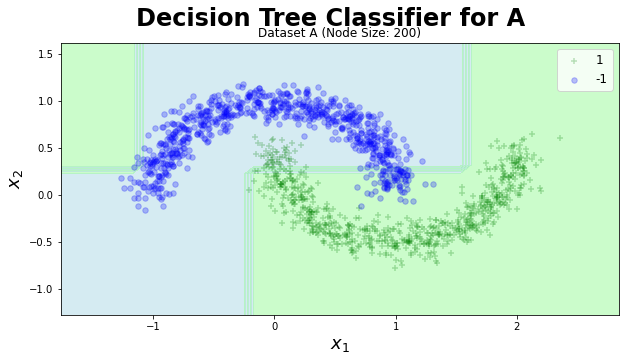

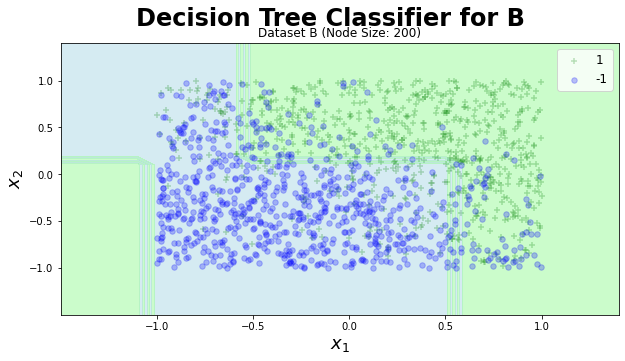

In [13]:
## Codewrite cell: Generate plots of learned decision tree classifier on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Plots only required for the accuracy criterion.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 2 
criterion='accuracy'
X_train2_A, Y_train2_A, X_test2_A, Y_test2_A, X_val2_A, Y_val2_A, X_train_for_val2_A, Y_train_for_val2_A = load_data('../../Data/dataset_A.npz')
X_train2_B, Y_train2_B, X_test2_B, Y_test2_B, X_val2_B, Y_val2_B, X_train_for_val2_B, Y_train_for_val2_B = load_data('../../Data/dataset_B.npz')
plt.rcParams['figure.figsize'] = [10,5]
fig,ax = plt.subplots(nrows = 1, ncols = 1)
node_arr = [200]
plot_Graph('A',X_train2_A, Y_train2_A, X_test2_A, Y_test2_A, fig, ax, node_arr,criterion = criterion)
fig,ax = plt.subplots(nrows = 1, ncols = 1)
node_arr = [200]
plot_Graph('B',X_train2_B, Y_train2_B, X_test2_B, Y_test2_B, fig, ax, node_arr,criterion = criterion)